# Brownian Bridge

In [83]:
import numpy as np
import math

def generate_transition_matrix(l):
    # Create the base Pi matrix (bi-diagonal with 1/2 entries)
    Pi = np.zeros((l, l))
    for i in range(l):
        for j in range(l):
            if(j == i + 1):
                if(i == 0):
                    Pi[i, i + 1] = .5 ##The branching structure is based on a truncated transition matrix
                else:
                    Pi[i, i + 1] = 0.5
            elif(j == i - 1):
                if(i == l-1):
                    Pi[i, i - 1] = .5 ##The branching structure is based on a truncated transition matrix
                else:
                    Pi[i, i - 1] = 0.5
    return Pi

def generate_transition_matrix_Doob(l, h_n_1, h_n, Pi):
    Pi_new = np.zeros((l, l))
    for i in range(l):
        for j in range(l):
            if(h_n_1[i] != 0):
                Pi_new[i,j] = Pi[i,j] * h_n[j] / h_n_1[i]
    return Pi_new

def compute_h_n(Pi, h_next):
    # Compute h_{n-1}(i) based on h_n(j)
    return np.dot(Pi, h_next)

def generate_time_dependent_Pi(N, num_steps, h_max):
    # Initialize base Pi matrix
    Pi = generate_transition_matrix(N)
    #print(Pi)
    
    # Initialize h_N vector (final condition)
    h_n = np.zeros(N)
    h_n[h_max] = 1  # h_N(j) = 1 if j=0, 0 otherwise
    
    # Iterate to generate Pi^(n) and h_{n-1}
    transition_matrices = []
    for n in range(num_steps, 0,  -1):
        
        #print(n)
        h_n_minus_1 = compute_h_n(Pi, h_n)
        print(h_n_minus_1)
        
        Pi_n = generate_transition_matrix_Doob(N, h_n_minus_1, h_n, Pi)
        transition_matrices.append(Pi_n)
        #print(Pi_n)
        
        # Update h_n for the next step
        h_n = h_n_minus_1
    
    return transition_matrices[::-1]

def generate_time_dependent_explicit_formula(N, step):
    """
    Generate the time-dependent transition matrix T^{(step)} for a specific step.
    """
    
    T = np.zeros((N, N))
    
    for i in range(N): # N = n + 1 in my notes
        if(i < N - 1):
            T[i, i + 1] = 1/2 * (1 + (1/2) * ((N - 1 - 2 * i) / (N - 1 - step + 1)))
        if(i > 0):
            T[i, i - 1] = 1/2 * (1 - (1/2) * ((N - 1 - 2 * i) / (N - 1 - step + 1)))
    return T

def binom(n, k):
    return math.factorial(n) // math.factorial(k) // math.factorial(n - k)

def harmonic_function_explicit(num_steps, l):
    hfun = np.zeros(num_steps+1)
    for i in range(num_steps+1):
        if(i + l >= num_steps / 2 and i + l <= 3 * num_steps / 2 and i - l >= - num_steps / 2 and i - l <= num_steps / 2):
            if(( 3 * int(num_steps / 2) - i - l ) % 2 == 0):
                #print(i, l)
                hfun[i] = binom(num_steps - l, int(( 3 * int(num_steps / 2) - i - l ) / 2 ) )
    return hfun

def simulate_process(N, num_steps, time_dependent_matrices, start_state=0):
    """
    Simulate the process using the time-dependent transition matrices.
    """
    # Initialize the state trajectory
    states = [start_state]
    
    # Simulate the process
    current_state = start_state
    for n in range(num_steps):
        # Get the transition probabilities for the current state
        probabilities = time_dependent_matrices[n][current_state]
        #print(probabilities)
        
        # Sample the next state based on the transition probabilities
        next_state = np.random.choice(range(N), p=probabilities)
        states.append(next_state)
        
        # Update the current state
        current_state = next_state
    
    return states

def simulate_process_explicit(N, num_steps, h_max, time_dependent_matrices, start_state):
    """
    Simulate the process using the time-dependent transition matrices.
    """
    # Initialize the state trajectory
    states = [start_state]
    
    # Simulate the process
    current_state = start_state
    for n in range(num_steps):
        # Get the transition probabilities for the current state
        probabilities = time_dependent_matrices[n][current_state]
        #print(probabilities)
        
        # Sample the next state based on the transition probabilities
        next_state = np.random.choice(range(N), p=probabilities)
        states.append(next_state)
        #print(next_state)
        
        # Update the current state
        current_state = next_state
    
    return states

In [75]:
from tqdm import tqdm

# Parameters
h_max = 2 #Max height
N = 2*h_max + 1  # Matrix size
num_steps = 2*h_max  # Number of time steps

# Generate the time-dependent transition matrices
time_dependent_matrices = generate_time_dependent_Pi(N, num_steps, h_max)

# Simulate the process starting from state 0
start_state = h_max
trajectory = list()
num_sim = 10000
for i in tqdm(range(num_sim)):
    trajectory.append(simulate_process(N, num_steps, time_dependent_matrices, start_state))

[0.  0.5 0.  0.5 0. ]
[0.25 0.   0.5  0.   0.25]
[0.    0.375 0.    0.375 0.   ]
[0.1875 0.     0.375  0.     0.1875]


100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 12051.98it/s]


In [76]:
time_dependent_matrices

[array([[0. , 1. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. ],
        [0. , 0.5, 0. , 0.5, 0. ],
        [0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 1. , 0. ]]),
 array([[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.33333333, 0.        , 0.66666667, 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.66666667, 0.        , 0.33333333],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]),
 array([[0. , 1. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. ],
        [0. , 0.5, 0. , 0.5, 0. ],
        [0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 1. , 0. ]]),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.]])]

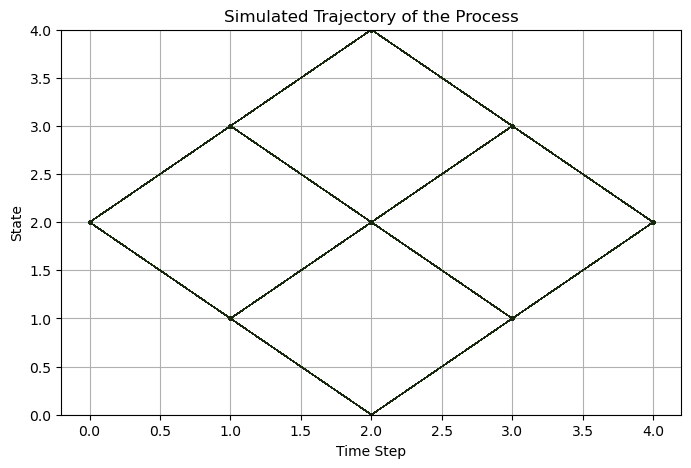

In [3]:
# Output the simulated trajectory
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
for i in range(len(trajectory)):
    plt.plot(range(len(trajectory[i])), trajectory[i], marker='.', linestyle='-', alpha=0.002)
plt.xlabel('Time Step')
plt.ylim([0,2*h_max])
plt.ylabel('State')
plt.title('Simulated Trajectory of the Process')
plt.grid(True)
plt.show()

(array([0.57  , 0.5535, 0.3765]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

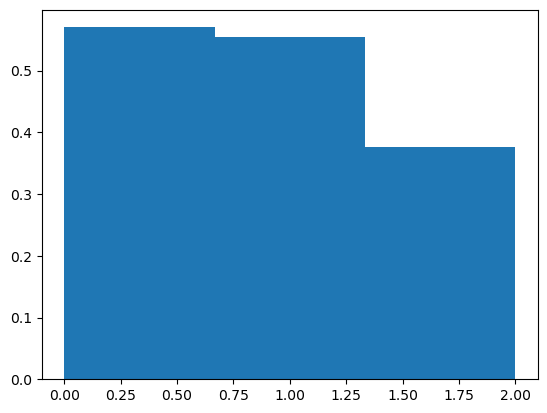

In [8]:
## Max Height distribustion

height_list = list()
for i in range(num_sim):
    height_list.append(max(np.abs(trajectory[i])) - h_max)

plt.hist(height_list, bins = 3, density = True)

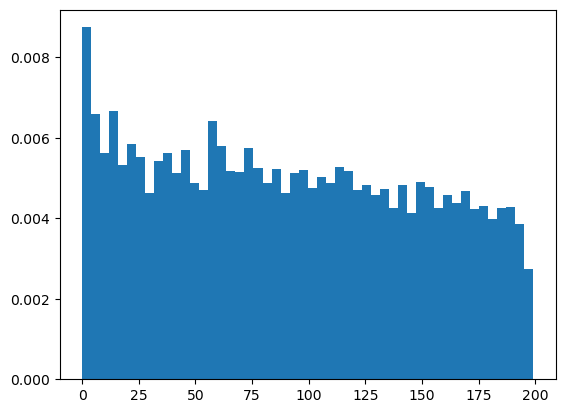

In [76]:
## Time Max Height distribution

time_list = list()
for i in range(num_sim):
    time_list.append(trajectory[i].index(max(np.abs(trajectory[i]))))

plt.hist(time_list, bins = 50, density = True)
plt.show()

In [80]:
# Parameters
h_max = 2 #Max height
N = 2*h_max + 1  # Matrix size
num_steps = 2*h_max  # Number of time steps

# Generate harmonic functions
for step in range(num_steps + 1):
    #print(step+1)
    print(harmonic_function_explicit(num_steps, step) / 2**(num_steps - step))

[0.    0.    0.375 0.    0.   ]
[0.    0.375 0.    0.375 0.   ]
[0.25 0.   0.5  0.   0.25]
[0.  0.5 0.  0.5 0. ]
[0. 0. 1. 0. 0.]


In [82]:
# Parameters
h_max = 2 #Max height
N = 2*h_max + 1  # Matrix size
num_steps = 2*h_max  # Number of time steps

# Generate the time-dependent transition matrices
time_dependent_matrices_explicit_formula = list()
for step in range(num_steps):
    #print(step+1)
    time_dependent_matrices_explicit_formula.append(generate_time_dependent_explicit_formula(N, step+1))
    print(time_dependent_matrices_explicit_formula[-1])

[[0.    0.75  0.    0.    0.   ]
 [0.375 0.    0.625 0.    0.   ]
 [0.    0.5   0.    0.5   0.   ]
 [0.    0.    0.625 0.    0.375]
 [0.    0.    0.    0.75  0.   ]]
[[0.         0.83333333 0.         0.         0.        ]
 [0.33333333 0.         0.66666667 0.         0.        ]
 [0.         0.5        0.         0.5        0.        ]
 [0.         0.         0.66666667 0.         0.33333333]
 [0.         0.         0.         0.83333333 0.        ]]
[[0.   1.   0.   0.   0.  ]
 [0.25 0.   0.75 0.   0.  ]
 [0.   0.5  0.   0.5  0.  ]
 [0.   0.   0.75 0.   0.25]
 [0.   0.   0.   1.   0.  ]]
[[0.  1.5 0.  0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.5 0.  0.5 0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  1.5 0. ]]


In [85]:
# Simulate the process starting from state 0
start_state = h_max
trajectory_explicit = list()
num_sim = 10000
for i in tqdm(range(num_sim)):
    trajectory_explicit.append(simulate_process_explicit(N, num_steps, h_max, time_dependent_matrices_explicit_formula, start_state))

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 11903.42it/s]


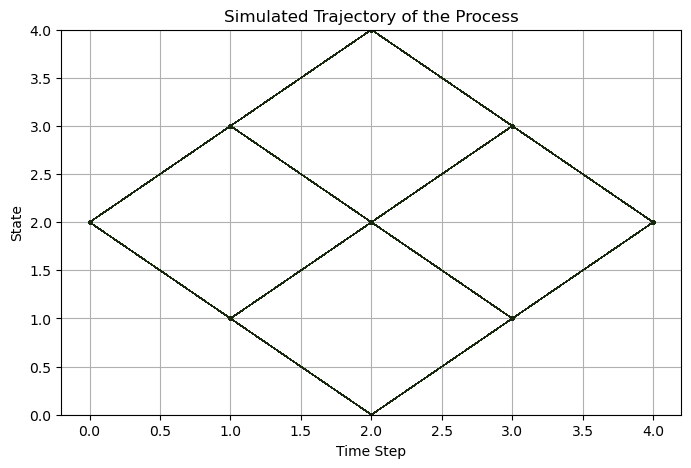

In [88]:
# Output the simulated trajectory
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
for i in range(len(trajectory)):
    plt.plot(range(len(trajectory_explicit[i])), trajectory_explicit[i], marker='.', linestyle='-', alpha=0.002)
plt.xlabel('Time Step')
plt.ylim([0,2*h_max])
plt.ylabel('State')
plt.title('Simulated Trajectory of the Process')
plt.grid(True)
plt.show()

NameError: name 'height_list' is not defined

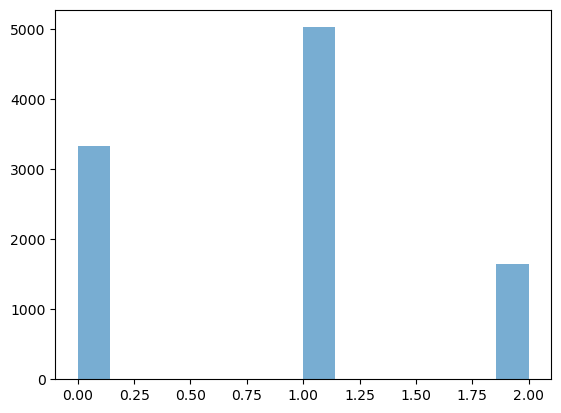

In [89]:
## Max Height distribustion

height_list_JuanP = list()
for i in range(num_sim):
    height_list_JuanP.append(max(np.abs(trajectory_explicit[i])) - h_max)

plt.hist(height_list_JuanP, bins = 14, alpha = 0.6)
plt.hist(height_list, bins = 14, alpha = 0.6)
plt.show()

NameError: name 'time_list' is not defined

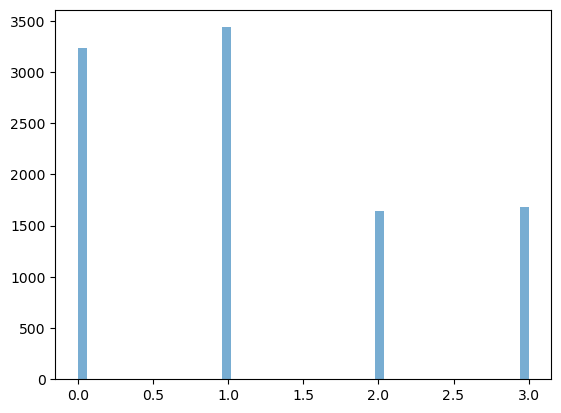

In [17]:
## Time Max Height distribution

time_list_JuanP = list()
for i in range(num_sim):
    time_list_JuanP.append(trajectory_JuanP[i].index(max(np.abs(trajectory_JuanP[i]))))

plt.hist(time_list_JuanP, bins =50, alpha = 0.6)
plt.hist(time_list, bins = 50, alpha = 0.6)
plt.show()

## Average distance as a function of time

In [49]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

num_sim = 10000
trajectory = list()
distance_from0 = list()

# Parameters
h_max = 50 #Max height
N = 2*h_max + 1  # Matrix size
num_steps = 2*h_max  # Number of time steps

# Generate the time-dependent transition matrices
time_dependent_matrices = generate_time_dependent_Pi(N, num_steps, h_max)

# Simulate the process starting from state 0
start_state = h_max

for i in range(num_sim):
    trajectory.append(simulate_process(N, num_steps, time_dependent_matrices, start_state))

for i in range(num_sim):
    distance_from0.append(np.abs(np.asarray(trajectory[i]) - h_max))

force_wr0 = np.zeros(len(distance_from0[0]))
for t in range(len(distance_from0[0])):
    temp = 0
    for i in range(num_sim):
        temp += distance_from0[i] / num_sim
    force_wr0 = temp

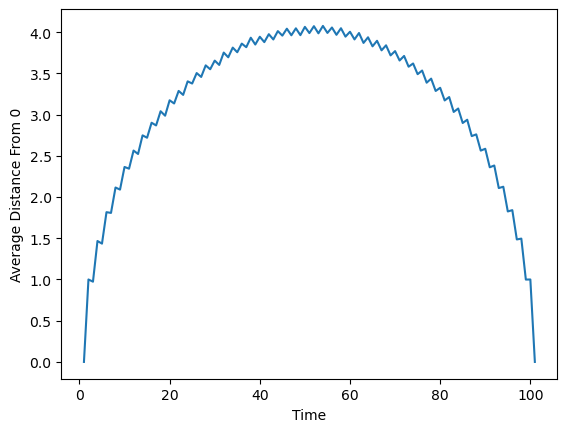

In [50]:
plt.plot(np.arange(1, len(force_wr0)+1), force_wr0)
plt.ylabel('Average Distance From 0')
plt.xlabel('Time')
plt.show()

### Obsolete from now on

In [16]:
import numpy as np
from tqdm import tqdm
from scipy.stats import entropy
import matplotlib.pyplot as plt

kl_list = list()
mean_height = list()
typ_height = list()
mean_height_JuanP = list()
typ_height_JuanP = list()
err = list()
err_JuanP = list()
num_sim = 10000
l_list = np.arange(2, 51, 1)

for h in tqdm(l_list):

    # Parameters
    h_max = h #Max height
    N = 2*h_max + 1  # Matrix size
    num_steps = 2*h_max  # Number of time steps
    
    # Generate the time-dependent transition matrices
    time_dependent_matrices = generate_time_dependent_Pi(N, num_steps, h_max)
    
    # Simulate the process starting from state 0
    start_state = h_max

    trajectory = list()
    for i in range(num_sim):
        trajectory.append(simulate_process(N, num_steps, time_dependent_matrices, start_state))

    # Generate the time-dependent transition matrices
    time_dependent_matrices_JuanP = list()
    for step in range(num_steps):
        time_dependent_matrices_JuanP.append(generate_time_dependent_Pi_JuanP(N, h_max, step+1))
        
    trajectory_JuanP = list()
    for i in range(num_sim):
        trajectory_JuanP.append(simulate_process_JuanP(N, num_steps, h_max, time_dependent_matrices_JuanP, start_state))
    
    height_list = list()
    for i in range(num_sim):
        height_list.append(max(np.abs(trajectory[i])) - h_max)
    
    height_list_JuanP = list()
    for i in range(num_sim):
        height_list_JuanP.append(max(np.abs(trajectory_JuanP[i])) - h_max)
     
    # Define the range and bins for the histograms
    bins = np.arange(min(min(np.abs(height_list)), max(np.abs(height_list_JuanP))), max(max(np.abs(height_list)), max(np.abs(height_list_JuanP)))+1)  # Define bins: [1, 2, 3, 4, 5, 6]
    #print(bins[1:])
    
    # Create histograms
    hist1, _ = np.histogram(height_list, bins=bins, density=False)
    hist2, _ = np.histogram(height_list_JuanP, bins=bins, density=False)

    # Normalize histograms to convert them into probability distributions
    prob_dist1 = hist1 / hist1.sum()
    prob_dist2 = hist2 / hist2.sum()
    
    #print(prob_dist1)
    #print(prob_dist2)
    
    mean_height.append(np.sum([prob_dist1[h-1] * h for h in bins[1:]]))
    mean_height_JuanP.append(np.sum([prob_dist2[h-1] * h for h in bins[1:]]))
    
    typ_height.append(prob_dist1.argmax(axis=0)+1)
    typ_height_JuanP.append(prob_dist2.argmax(axis=0)+1)
    
    #print(mean_height)
    
    err.append(np.sqrt(np.var(height_list)))
    err_JuanP.append(np.sqrt(np.var(height_list_JuanP)))
    
    # Calculate KL divergence
    kl_list.append(entropy(prob_dist1, prob_dist2))

100%|███████████████████████████████████████████| 49/49 [21:18<00:00, 26.09s/it]


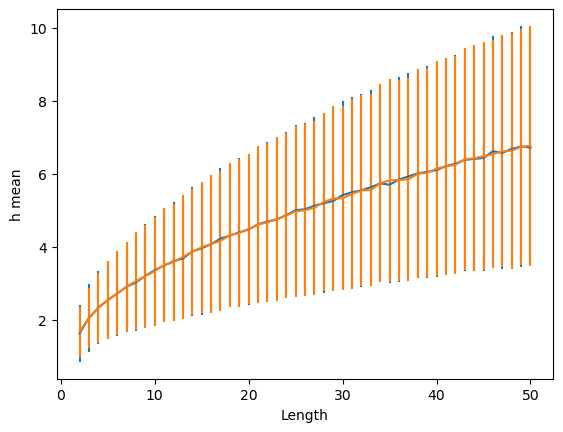

In [18]:
plt.errorbar(l_list, mean_height, yerr = err)
plt.errorbar(l_list, mean_height_JuanP, yerr = err_JuanP)
plt.xlabel('Length')
plt.ylabel('h mean')
plt.show()

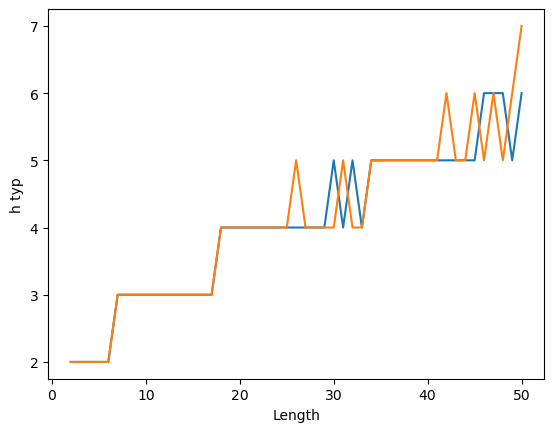

In [20]:
plt.plot(l_list, typ_height)
plt.plot(l_list, typ_height_JuanP)
plt.xlabel('Length')
plt.ylabel('h typ')
plt.show()